In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
df[["Deck","Room_No"]] = df["Cabin"].str.extract(r"([A-Za-z]+)(\d*)")

 ([A-Za-z]+)
[] – A character set, here [A-Za-z] means any letter (uppercase or lowercase).

A-Z – Matches uppercase letters.

a-z – Matches lowercase letters.

+ – One or more of the preceding characters.

(\d*)
\d – Matches any digit (0–9).

* – Matches zero or more of the preceding token.

In [17]:
df = df[["Survived","Deck","Room_No"]]

In [18]:
df.head()

,Survived,Deck,Room_No
0,0,NaN,NaN
1,1,C,85
2,1,NaN,NaN
3,1,C,123
4,0,NaN,NaN


<Axes: xlabel='Deck'>

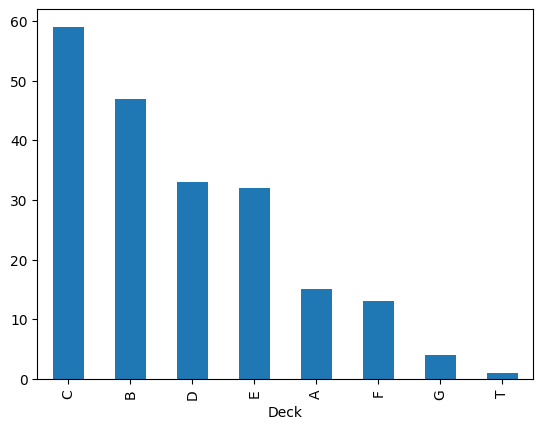

In [23]:
df["Deck"].value_counts().plot.bar()

In [25]:
df1 = pd.read_csv("train.csv")

In [26]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df1 = df1[["Survived","Ticket"]]

In [28]:
df1.head()

,Survived,Ticket
0,0,A/5 21171
1,1,PC 17599
2,1,STON/O2. 3101282
3,1,113803
4,0,373450


In [30]:
df1["Ticket_num"] = df1["Ticket"].apply(lambda x:x.split()[-1])
df1["Ticket_num"] = pd.to_numeric(df1["Ticket_num"], errors = "coerce", downcast="integer")

In [31]:
df1.head()

,Survived,Ticket,Ticket_num
0,0,A/5 21171,21171.0
1,1,PC 17599,17599.0
2,1,STON/O2. 3101282,3101282.0
3,1,113803,113803.0
4,0,373450,373450.0


In [38]:
df1["Tiket_cat"] = df1["Ticket"].apply(lambda s:s.split()[0])
df1["Tiket_cat"] = np.where(df1["Tiket_cat"].str.isdigit(), np.nan,df1["Tiket_cat"])
df1.sample(10)

,Survived,Ticket,Ticket_num,Tiket_cat
345,1,248733,248733.0,NaN
751,1,392096,392096.0,NaN
396,0,350407,350407.0,NaN
783,0,W./C. 6607,6607.0,W./C.
563,0,SOTON/OQ 392082,392082.0,SOTON/OQ
122,0,237736,237736.0,NaN
578,0,2689,2689.0,NaN
698,0,17421,17421.0,NaN
332,0,PC 17582,17582.0,PC
591,1,36947,36947.0,NaN


In [39]:
df1["Tiket_cat"].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

<Axes: xlabel='Tiket_cat'>

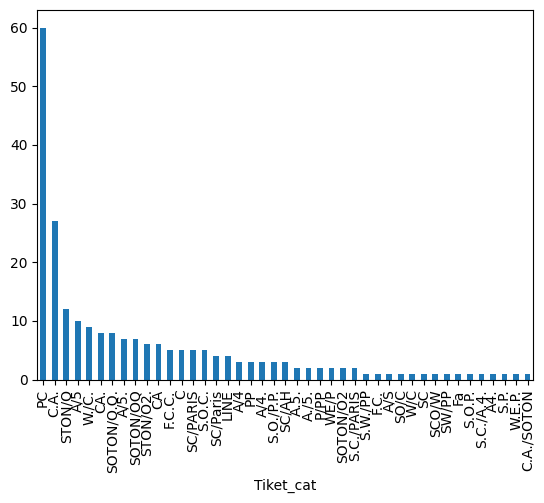

In [52]:
df1["Tiket_cat"].value_counts().plot.bar()